In [28]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
from PIL import Image
from numpy import array
img = Image.open("circle/0.png")
arr = array(img)

In [30]:
shape_name = ["Circle","Square","Star","Triangle"]

In [31]:
shapes = []
labels = []
for i in range(0,3720): #3720
    img = Image.open("circle/" + str(i) + ".png")
    img=img.resize((60,60))
    arr = array(img)
    shapes.append(arr)
    labels.append([1,0,0,0])

In [32]:
for i in range(0,3765): #3765
    img = Image.open("square/" + str(i) + ".png")
    img=img.resize((60,60))
    arr = array(img)
    shapes.append(arr)
    labels.append([0,1,0,0])

In [33]:
for i in range(0,3765): #3765
    img = Image.open("star/" + str(i) + ".png")
    img=img.resize((60,60))
    arr = array(img)
    shapes.append(arr)
    labels.append([0,0,1,0])

In [34]:
for i in range(0,3720):  #3720
    img = Image.open("triangle/" + str(i) + ".png")
    img=img.resize((60,60))
    arr = array(img)
    shapes.append(arr)
    labels.append([0,0,0,1])

In [35]:
for i in range(len(shapes)):
    shapes[i] = shapes[i].flatten()

In [36]:
shapes = np.asarray(shapes)
labels = np.asarray(labels)

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [38]:
from sklearn.cross_validation import train_test_split

In [39]:
X_us_train, X_us_test, y_us_train, y_us_test = train_test_split(shapes, labels, test_size=0.25, random_state=42)
scaler.fit(X_us_train)
X_train = scaler.transform(X_us_train)
scaler.fit(X_us_test)
X_test = scaler.transform(X_us_test)
scaler.fit(y_us_train)
y_train = scaler.transform(y_us_train)
scaler.fit(y_us_test)
y_test = scaler.transform(y_us_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [40]:
def Display_shape_test(num):
    #print(y_test[num])
    label=y_test[num].argmax(axis=0)
    image=(255-X_us_test[num]).reshape([60,60])
    #plt.title('Example: %d Label: %d'%(num,shape_name[label]))
    plt.imshow(image,cmap=plt.get_cmap('gray_r'))
    plt.show()

In [41]:
def Display_shape_train(num):
    #print(y_train[num])
    label=y_train[num].argmax(axis=0)
    image=(255-X__us_train[num]).reshape([60,60])
    #plt.title('Example: %d Label: %d'%(num,shape_name[label]))
    plt.imshow(image,cmap=plt.get_cmap('gray_r'))
    plt.show()

In [42]:
tf.device("/gpu:0")

In [43]:
sess = tf.Session()

In [44]:
x = tf.placeholder(tf.float32,[None,3600])
y_ = tf.placeholder(tf.float32,[None,4])
W = tf.Variable(tf.zeros([3600,4]))
b = tf.Variable(tf.zeros([4]))

In [45]:
y = tf.nn.softmax(tf.matmul(x,W)+b)

In [46]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y),reduction_indices=[1]))
LEARNING_RATE = 0.1
TRAIN_STEPS = 1500

In [47]:
sess.run(tf.global_variables_initializer())

In [48]:
training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
for i in range(TRAIN_STEPS+1):
    sess.run(training,feed_dict={x:X_train,y_:y_train})
    if i%100 == 0:
        print('Training Step:' + str(i) + ' Accuracy = '+ str(sess.run(accuracy,feed_dict={x:X_test,y_:y_test})) + ' Loss = ' + str(sess.run(cross_entropy,{x:X_train,y_:y_train})))

Training Step:0 Accuracy = 0.253273 Loss = 1.54156
Training Step:100 Accuracy = 0.98958 Loss = 0.0312984
Training Step:200 Accuracy = 0.989847 Loss = 0.0247442
Training Step:300 Accuracy = 0.990916 Loss = 0.0215589
Training Step:400 Accuracy = 0.991985 Loss = 0.0192197
Training Step:500 Accuracy = 0.993053 Loss = 0.0173875
Training Step:600 Accuracy = 0.993588 Loss = 0.0159108
Training Step:700 Accuracy = 0.993321 Loss = 0.0146899
Training Step:800 Accuracy = 0.993053 Loss = 0.0136567
Training Step:900 Accuracy = 0.992786 Loss = 0.0127651
Training Step:1000 Accuracy = 0.992519 Loss = 0.0119842
Training Step:1100 Accuracy = 0.992252 Loss = 0.0112926
Training Step:1200 Accuracy = 0.991985 Loss = 0.0106751
Training Step:1300 Accuracy = 0.992519 Loss = 0.0101203
Training Step:1400 Accuracy = 0.992252 Loss = 0.00961952
Training Step:1500 Accuracy = 0.992252 Loss = 0.00916565


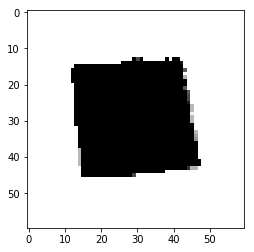

Square


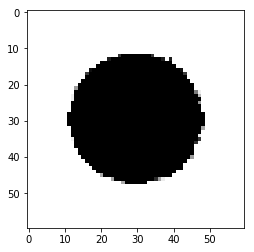

Circle


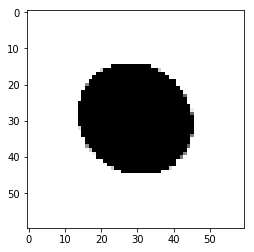

Circle


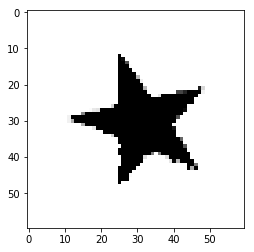

Star


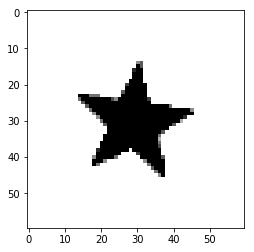

Star


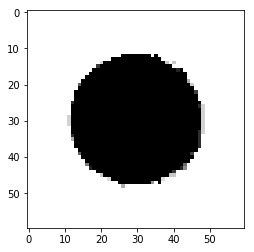

Circle


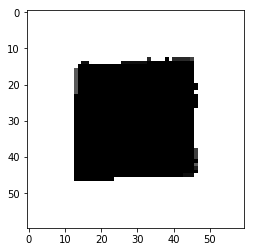

Square


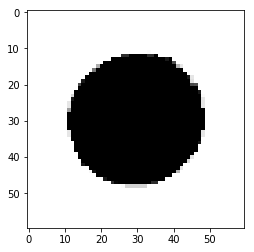

Circle


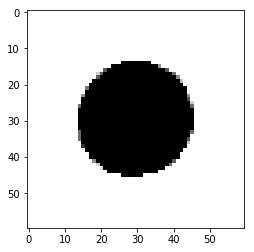

Circle


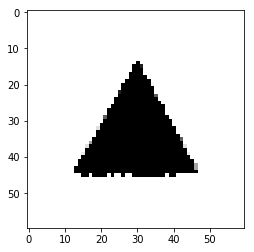

Triangle


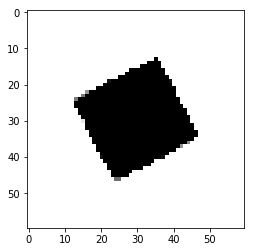

Square


In [49]:
for i in range(0,11):
    Display_shape_test(i)
    answer = sess.run(y, feed_dict={x: X_test})

    print(shape_name[answer[i].argmax()])